# 2: Data Exploration
Author: Daniel Lusk

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'
import json
from pathlib import Path

import pandas as pd
import seaborn as sns
from utils.datasets import CollectionName, DataCollection, Dataset, GBIFBand
from utils.visualize import plot_distributions

%load_ext autoreload
%autoreload 2

RES = 0.5

### Plotting configuration
sns.set_theme(
    context="paper",
    style="ticks",
    palette="deep",
    font="FreeSans",
    font_scale=1,
    color_codes=True,
    rc=None,
)

# Figure directory
fig_dir = Path("reports/figures")

2024-01-02 17:08:53.975424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 17:08:54.587940: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## sPlotOpen and GBIF raw occurrence data

In [3]:
gbif = pd.read_csv("data/gbif-splot_raw/gbif_clean_tax-spat.csv")
splot = pd.read_csv("data/gbif-splot_raw/sPlotOpen_TRYgapfilled.csv")
splot_cwm = pd.read_csv("data/gbif-splot_raw/sPlotOpen_TRYgapfilled_cwm.csv")

# Standardize column names
gbif = gbif.rename(columns={"decimalLatitude": "lat", "decimalLongitude": "lon"})
splot = splot.rename(columns={"Latitude": "lat", "Longitude": "lon"})
splot_cwm = splot_cwm.rename(columns={"Latitude": "lat", "Longitude": "lon"})

In [6]:
splot_cwm.head()

,PlotObservationID,Releve_area,lat,lon,X1080,X11,X13,X138,X14,X144,...,X3114,X3120,X4,X46,X47,X50,X55,X6,X78,X95
0,16,NaN,62.42,-154.18,5323.593548,13.288268,459.744335,167.314329,16.858434,43.535250,...,63.057953,2.837803,0.336999,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061
1,17,NaN,62.42,-154.18,5323.593548,13.288268,459.744335,167.314329,16.858434,43.535250,...,63.057953,2.837803,0.336999,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061
2,18,NaN,62.42,-154.18,5323.593548,13.288268,459.744335,167.314329,16.858434,43.535250,...,63.057953,2.837803,0.336999,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061
3,20,NaN,62.42,-154.18,8146.559461,15.105879,457.630398,22.061955,19.508648,8.946046,...,42.395932,3.892607,0.496094,0.204036,0.299290,1.393661,5.585184,0.518140,-3.232422,90.010427
4,22,NaN,62.42,-154.18,7424.037901,15.483192,456.943897,442.804275,20.750032,11.270150,...,84.587695,4.296718,0.497012,0.216458,0.287622,1.429345,8.661573,0.480919,-3.195510,89.458775


Plot global observation densities

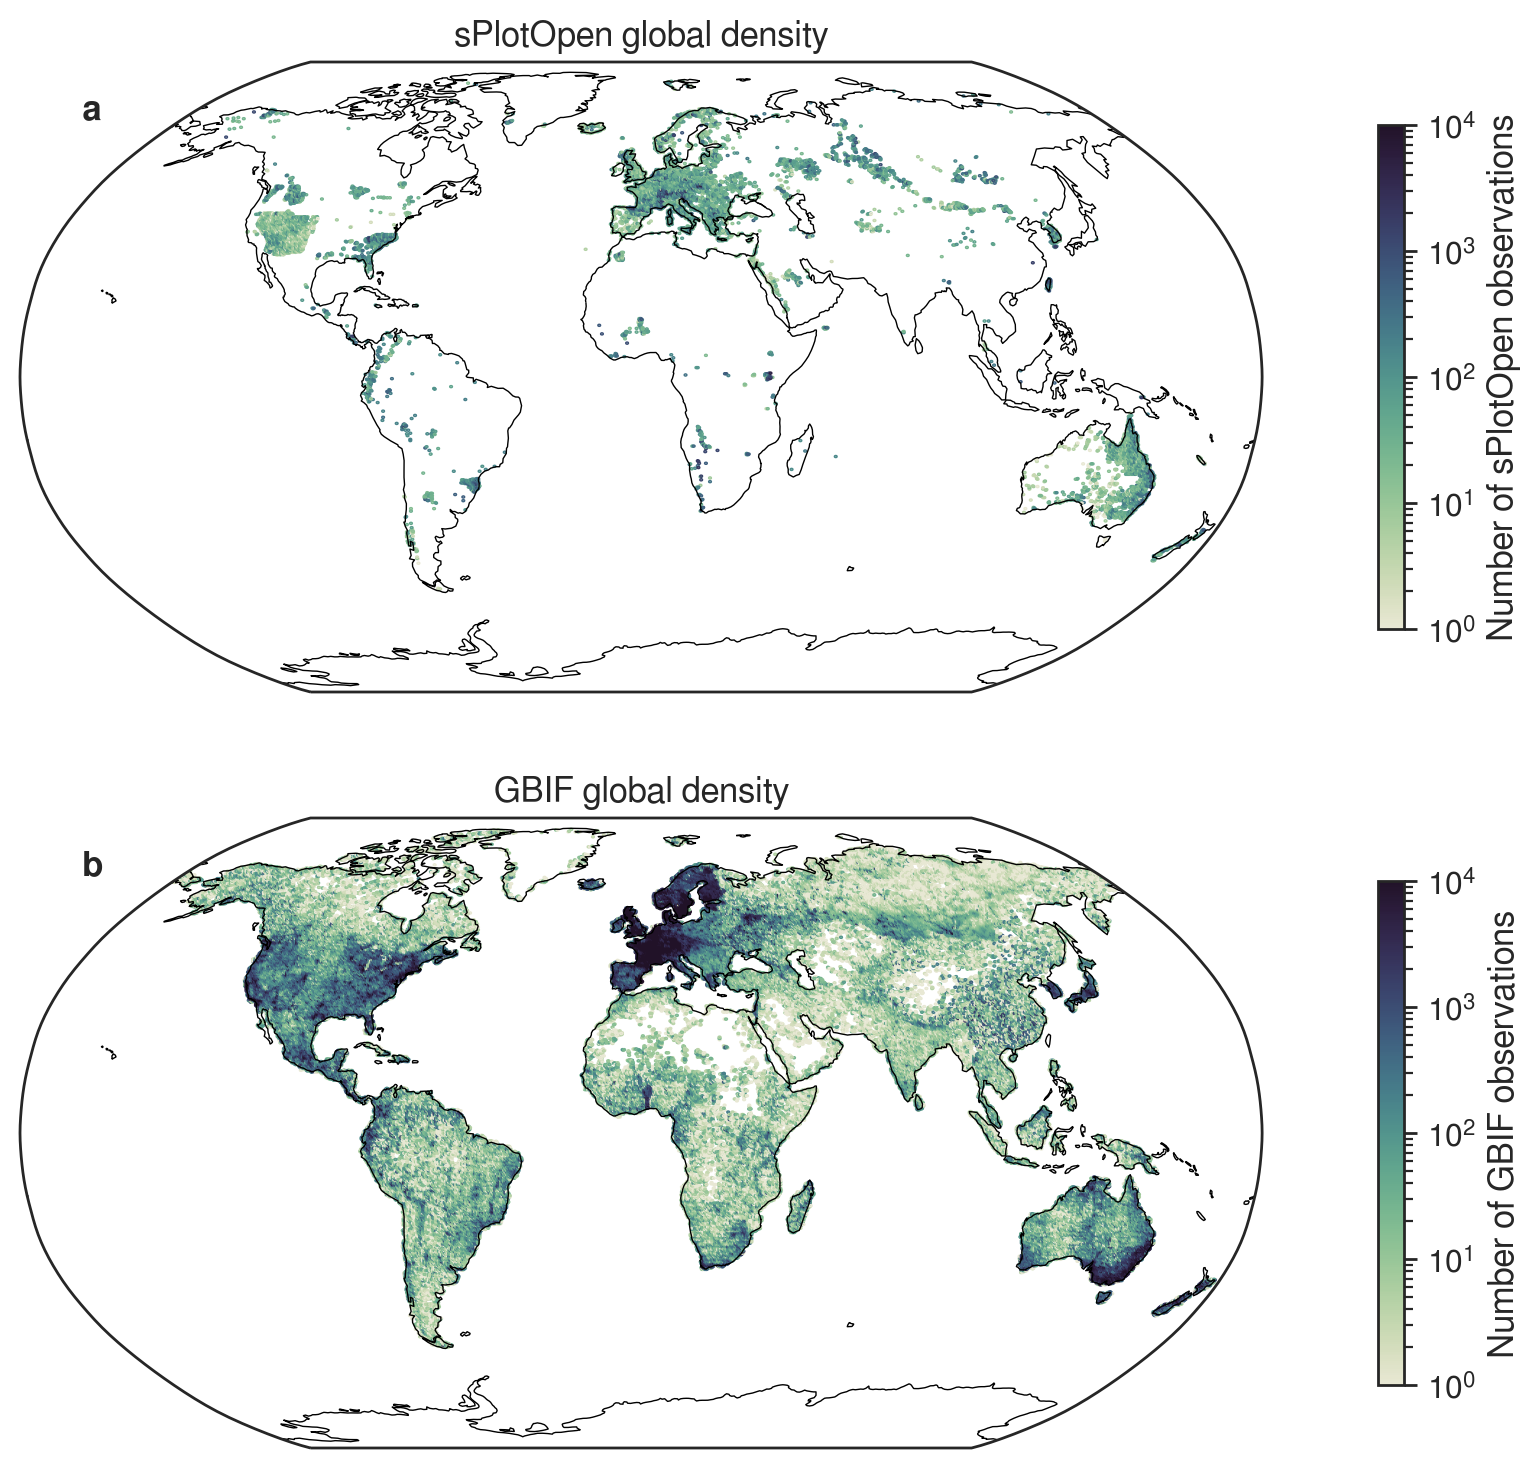

In [8]:
from utils.visualize import plot_hex_density


plot_hex_density(
    [splot, gbif],
    ncols=1,
    log=True,
    names=["sPlotOpen", "GBIF"],
    label_subplots=True,
    context="paper",
    font_scale=1.3,
    out_fn="reports/figures/gbif-splot-densities.pdf",
);

## TRY + GBIF/iNaturalist trait maps

### Visualize TRY + GBIF/iNaturalist trait maps

First, let's look at the trait maps generated from TRY/iNaturalist observations by [Wolf, et al. (2022)](https://doi.org/10.1038/s41559-022-01904-x).

In [2]:
gbif = Dataset(
    res=RES,
    collection_name=CollectionName.GBIF,
    band=GBIFBand.MEAN
)

splot = Dataset(
    res=RES,
    collection_name=CollectionName.SPLOT,
    band=GBIFBand.MEAN
)

gbif_ln = Dataset(
    res=RES,
    collection_name=CollectionName.GBIF_LN,
)

splot_ln = Dataset(
    res=RES,
    collection_name=CollectionName.SPLOT_LN,
)

In [ ]:
# Map trait IDs to trait names

# Rename response variable values according to the trait id -> trait name mapping
with open("./trait_mapping.json", "r") as f:
    mapping = json.load(f)

# Replace each column in gbif.df and splot.df according to the pattern "TRYgapfilled_X{trait_id}_" with {trait_name}
for trait_id, trait_names in mapping.items():
    gbif.df = gbif.df.rename(columns={f"GBIF_TRYgapfilled_X{trait_id}_05deg_mean": f"GBIF_{trait_names["short"]}_05deg_mean"})
    splot.df = splot.df.rename(columns={f"sPlot_TRYgapfilled_X{trait_id}_05deg_mean": f"sPlot_{trait_names["short"]}_05deg_mean"})
    gbif_ln.df = gbif_ln.df.rename(columns={f"GBIF_TRYgapfilled_X{trait_id}_05deg_mean_ln": f"GBIF_{trait_names["short"]}_05deg_mean_ln"})
    splot_ln.df = splot_ln.df.rename(columns={f"sPlot_TRYgapfilled_X{trait_id}_05deg_mean_ln": f"sPlot_{trait_names["short"]}_05deg_mean_ln"})


### GBIF trait distributions

In [ ]:
plot_distributions(gbif.df.drop(columns=["geometry"]), pdf=True)


In [ ]:
plot_distributions(gbif_ln.df.drop(columns=["geometry"]), pdf=True)

### sPlotOpen trait distributions

In [ ]:
plot_distributions(splot.df.drop(columns=["geometry"]), pdf=True)

In [ ]:
plot_distributions(splot_ln.df.drop(columns=["geometry"]), pdf=True)

## Predictor data

### MODIS surface reflectances

In [3]:
modis = Dataset(
    res=RES,
    collection_name=CollectionName.MODIS,
)

Inspect each feature for anomalies

In [ ]:
modis.plot_rasters()

Inspect feature distributions

In [ ]:
modis.plot_distributions(pdf=True)

### WorldClim bio variables

In [4]:
wc = Dataset(
    res=RES,
    collection_name=CollectionName.WORLDCLIM
)

Inspect features for anomalies

In [ ]:
wc.plot_rasters()

Inspect feature distributions

In [ ]:
wc.plot_distributions(pdf=True)

### ISRIC SoilGrids

In [5]:
soil = Dataset(
    res=RES,
    collection_name=CollectionName.SOIL
)

In [ ]:
soil.plot_rasters()

In [ ]:
soil.plot_distributions(pdf=True)

### VODCA

In [6]:
vodca = Dataset(
    res=RES,
    collection_name=CollectionName.VODCA,
)

In [ ]:
vodca.plot_rasters()

In [ ]:
vodca.plot_distributions(pdf=True)

## Trait-Prediction distance distributions

In [7]:
from utils.datasets import DataCollection


predictions = DataCollection([wc, modis, soil, vodca])

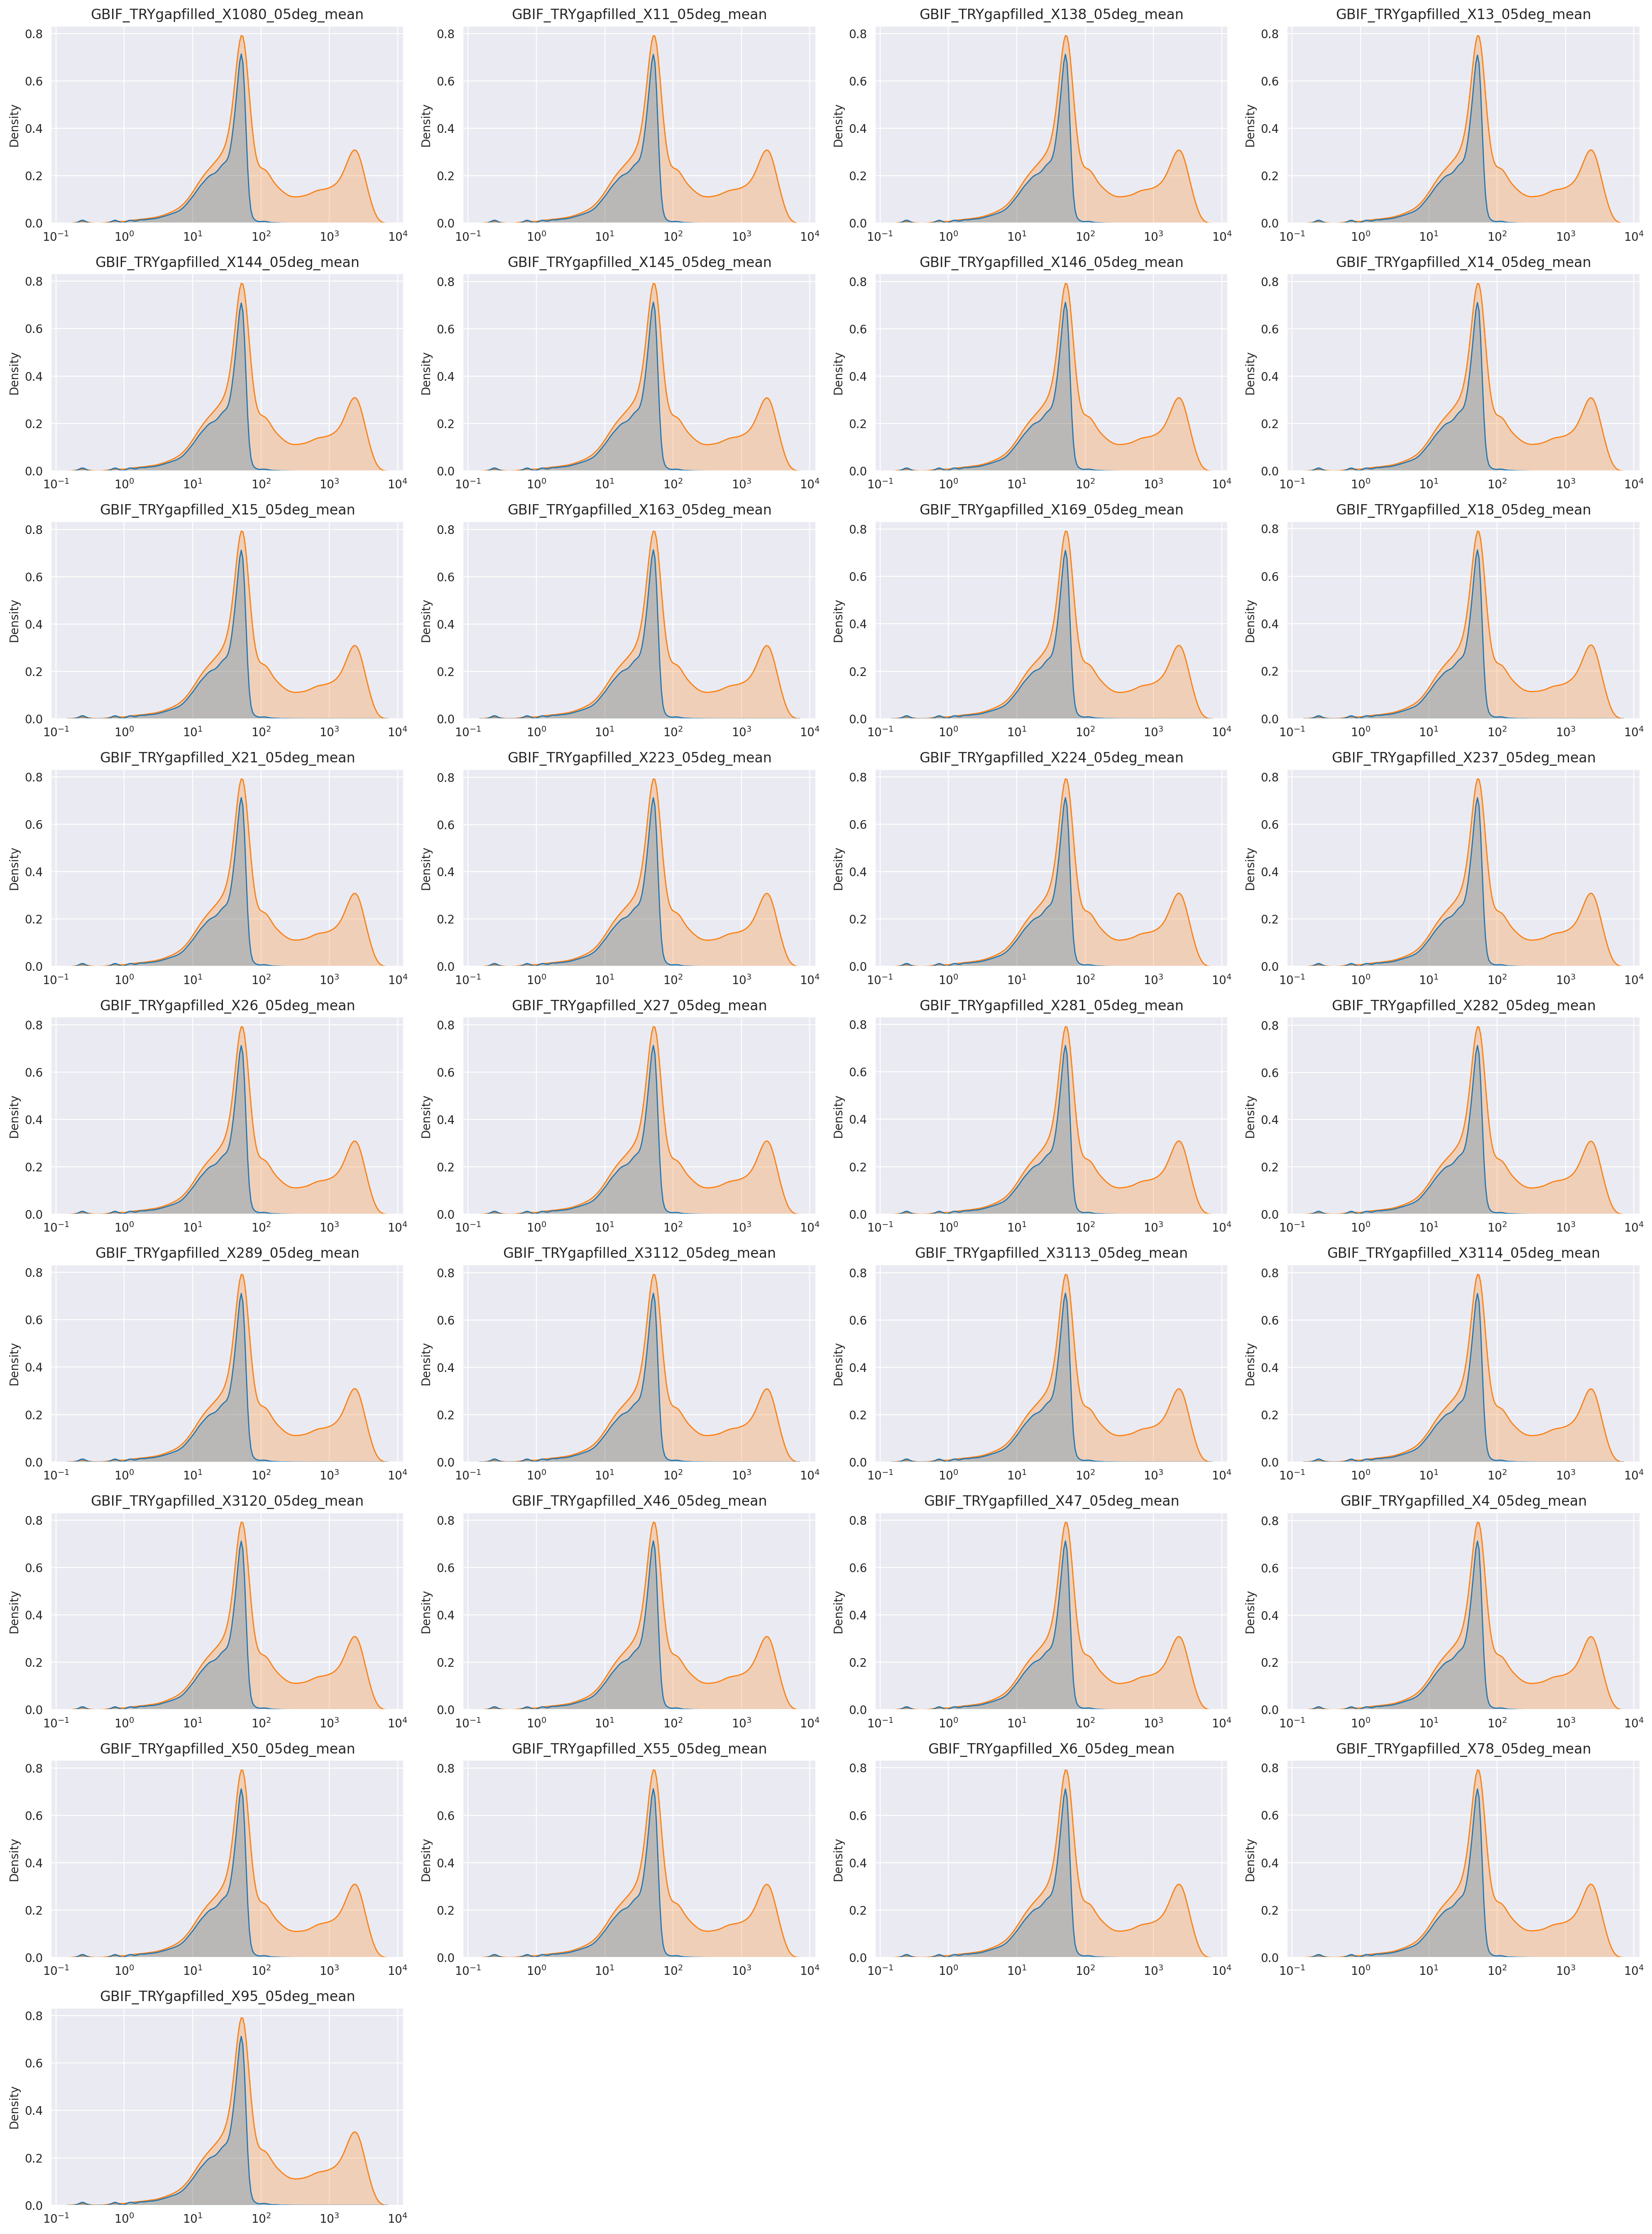

In [18]:
from utils.visualize import plot_spatial_distribution


plot_spatial_distribution(gbif.df, predictions.df)